In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [26]:
df = pd.read_csv('data/GlassClassification/glass.csv', encoding='utf-8')
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [4]:
df.profile_report(title='glass - report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df.drop_duplicates(inplace=True)

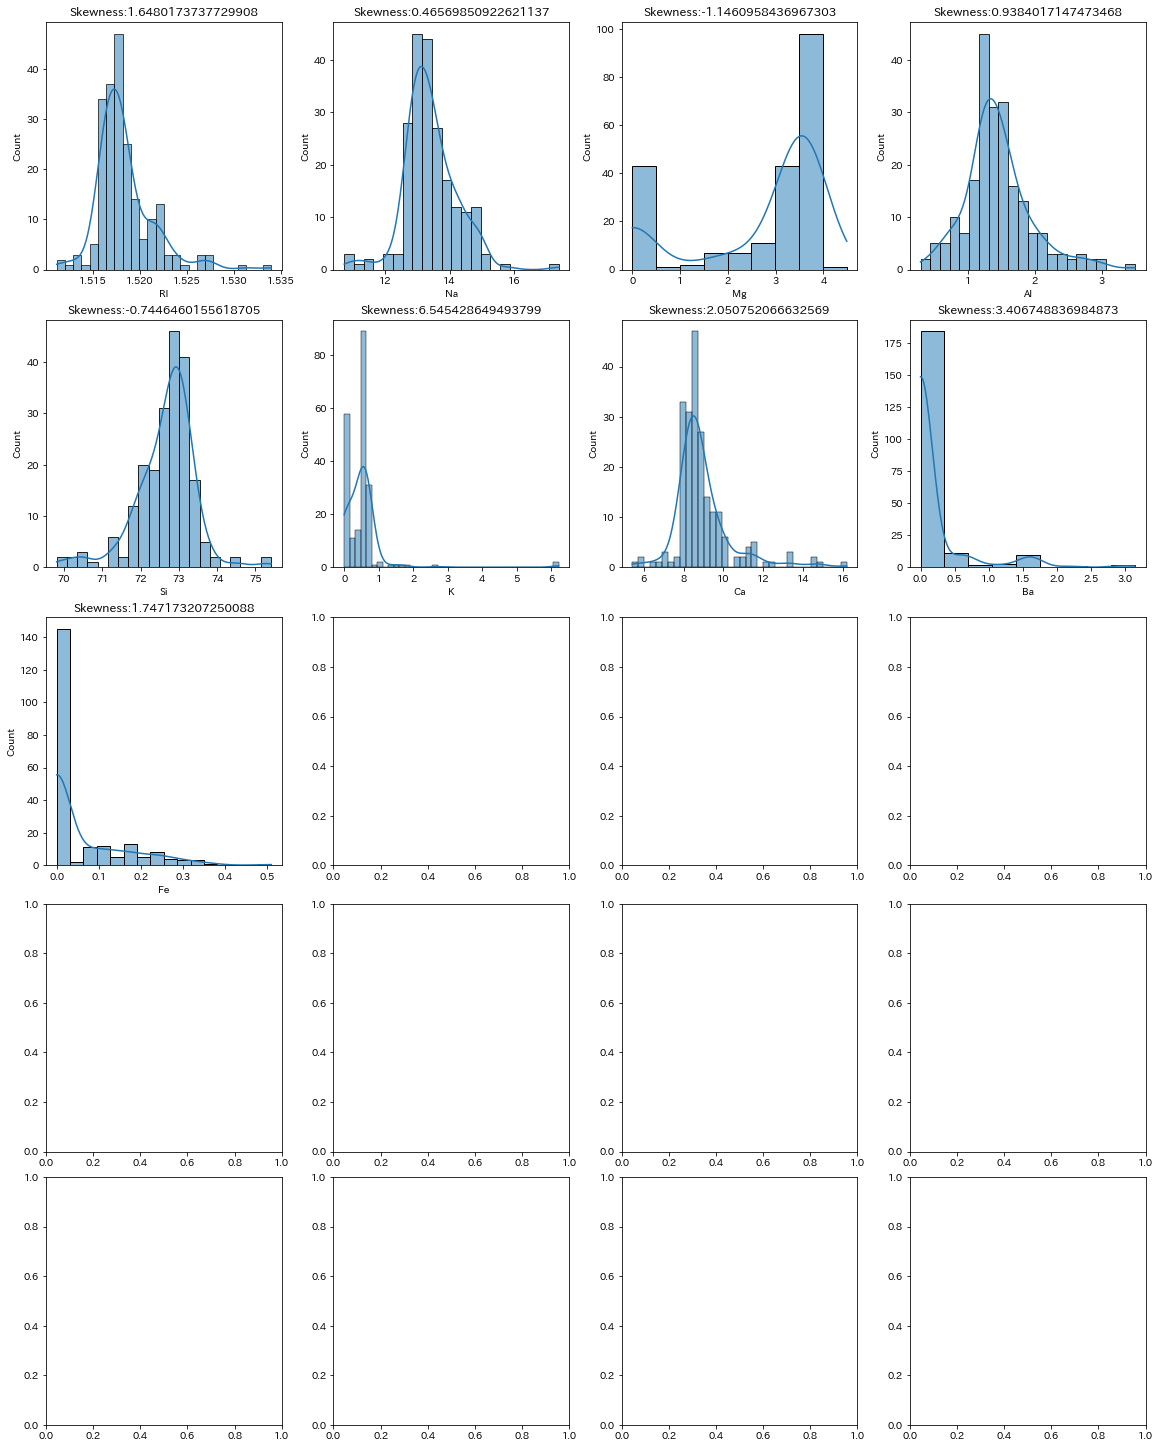

In [6]:
fig,ax=plt.subplots(5,4, figsize=(16,20),constrained_layout=True)
ax=ax.ravel()

for index, col in enumerate(df.dtypes[df.dtypes != 'object'].index[:-1]):
    sns.histplot(x=col,data=df,ax=ax[index],
               kde=True)
    ax[index].set_title(f'Skewness:{df[col].skew(axis = 0)}')

In [28]:
X = df.drop('Type', axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(170, 9)
(43, 9)


In [29]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [30]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.652941       0.652941    0.652941   
1        KNeighborsClassifier      0.741176       0.741176    0.741176   
2                         SVC      0.358824       0.358824    0.358824   
3                  GaussianNB      0.523529       0.523529    0.523529   
4      DecisionTreeClassifier      0.717647       0.717647    0.717647   
5      RandomForestClassifier      0.770588       0.770588    0.770588   
6  GradientBoostingClassifier      1.000000       1.000000    1.000000   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.652941       0.627907        0.627907     0.627907  0.627907  
1  0.741176       0.744186        0.744186     0.744186  0.744186  
2  0.358824       0.348837        0.348837     0.348837  0.348837  
3  0.523529       0.511628        0.511628     0.511628  0.511628  
4  0.717647       0.697674        0.697674     0.697674  0.697674  
5  0.770588       0.767442        0.767442     0.767442  0.767442  
6  1.000000       0.790698        0.790698     0.790698  0.790698

In [31]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [32]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.705882       0.705882    0.705882   
1        KNeighborsClassifier      0.723529       0.723529    0.723529   
2                         SVC      0.800000       0.800000    0.800000   
3                  GaussianNB      0.523529       0.523529    0.523529   
4      DecisionTreeClassifier      0.717647       0.717647    0.717647   
5      RandomForestClassifier      0.770588       0.770588    0.770588   
6  GradientBoostingClassifier      1.000000       1.000000    1.000000   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.705882       0.604651        0.604651     0.604651  0.604651  
1  0.723529       0.651163        0.651163     0.651163  0.651163  
2  0.800000       0.744186        0.744186     0.744186  0.744186  
3  0.523529       0.511628        0.511628     0.511628  0.511628  
4  0.717647       0.697674        0.697674     0.697674  0.697674  
5  0.770588       0.767442        0.767442     0.767442  0.767442  
6  1.000000       0.813953        0.813953     0.813953  0.813953

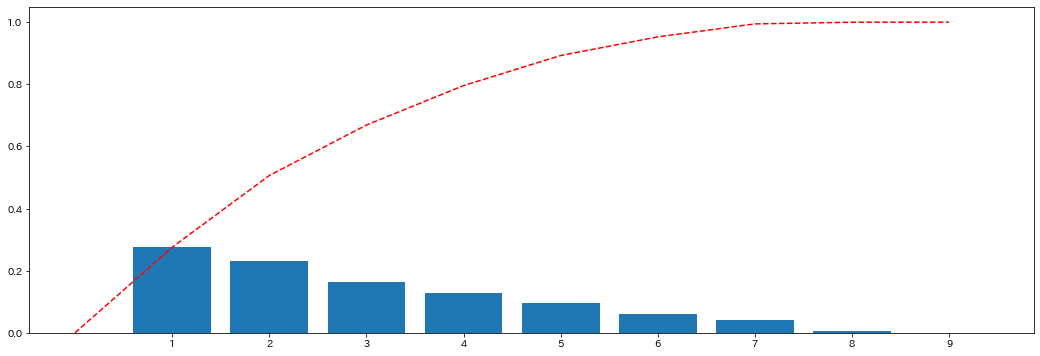

In [33]:
plt.figure(figsize=(18,6))
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [35]:
n = 4
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

TypeError: '(slice(None, None, None), slice(None, 4, None))' is an invalid key

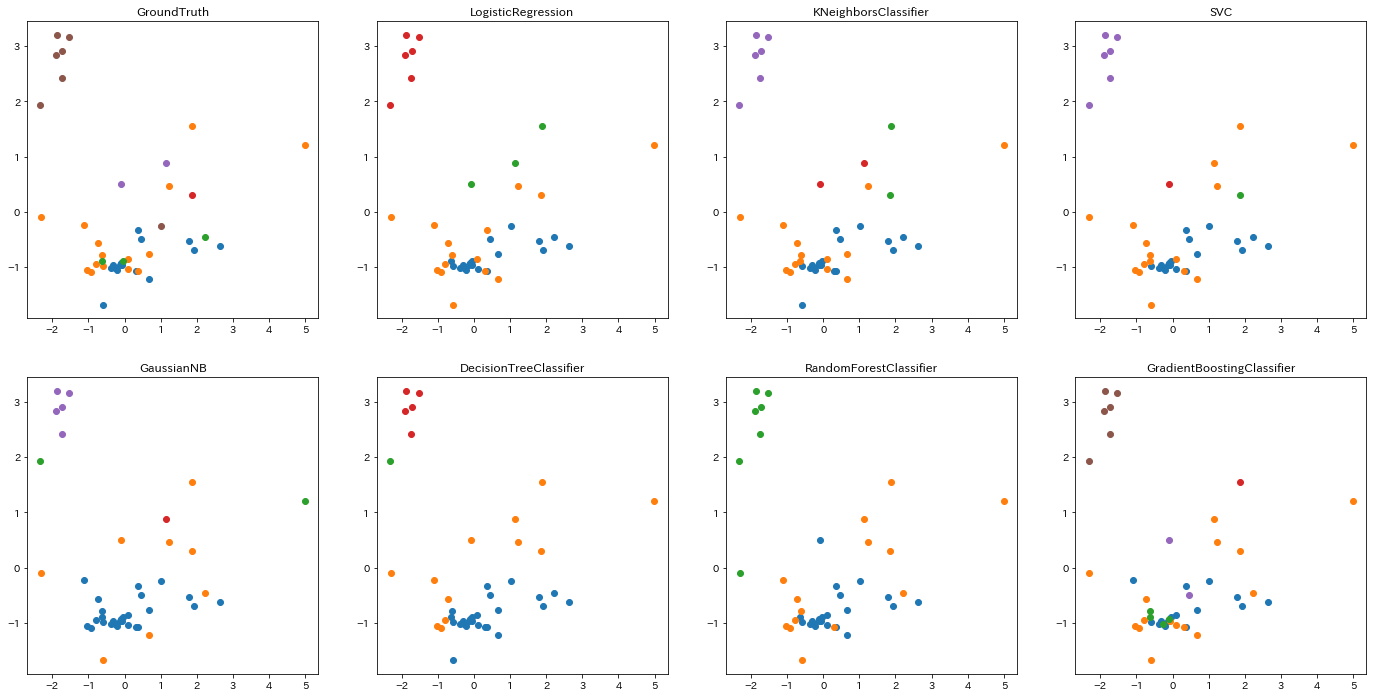

モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.641176       0.641176    0.641176   
1        KNeighborsClassifier      0.770588       0.770588    0.770588   
2                         SVC      0.782353       0.782353    0.782353   
3                  GaussianNB      0.511765       0.511765    0.511765   
4      DecisionTreeClassifier      0.641176       0.641176    0.641176   
5      RandomForestClassifier      0.758824       0.758824    0.758824   
6  GradientBoostingClassifier      1.000000       1.000000    1.000000   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.641176       0.674419        0.674419     0.674419  0.674419  
1  0.770588       0.813953        0.813953     0.813953  0.813953  
2  0.782353       0.720930        0.720930     0.720930  0.720930  
3  0.511765       0.511628        0.511628     0.511628  0.511628  
4  0.641176       0.674419        0.674419     0.674419  0.674419  
5  0.758824       0.651163        0.651163     0.651163  0.651163  
6  1.000000       0.558140        0.558140     0.558140  0.558140

In [36]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_train_pca)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test_pca)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp

In [38]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
df2 = df.copy()
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
# NOTE: 数値型の列名をだけを`numerics2`という配列変数に代入
for i in df2.columns[:-1]:
    if df2[i].dtype in numeric_dtypes:
        numerics2.append(i)

# NOTE: 各列のskewnessを計算して配列にした後、skewnessの大きい順にソートする
skew_features = df2[numerics2].skew(axis = 0).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    df2[i] = boxcox1p(df2[i], boxcox_normmax(df2[i] + 1))

C:\Users\ishih\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


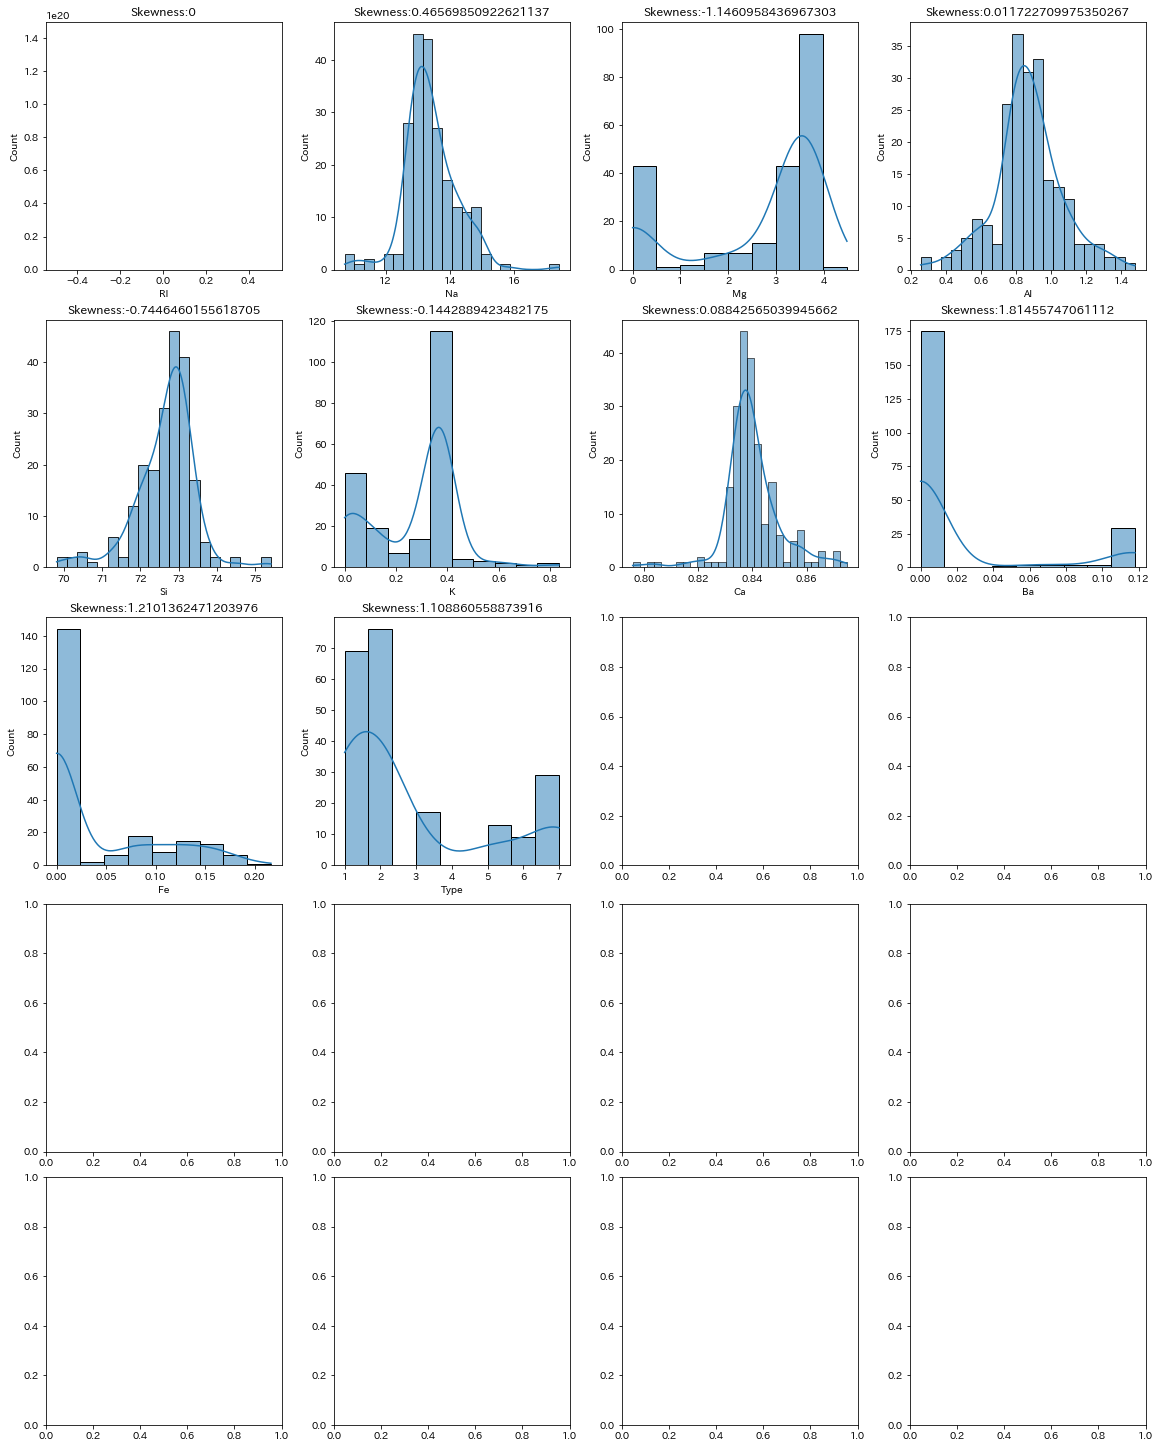

In [39]:
fig,ax=plt.subplots(5,4, figsize=(16,20),constrained_layout=True)
ax=ax.ravel()

for index, col in enumerate(df2.columns):
    sns.histplot(x=col,data=df2,ax=ax[index],
               kde=True)
    ax[index].set_title(f'Skewness:{df2[col].skew(axis = 0)}')

In [40]:
X = df2.drop('Type', axis=1)
y = df2['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(170, 9)
(43, 9)


In [41]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


モデル名  Accuracy(訓練)  Precision(訓練)  Recall(訓練)  \
0          LogisticRegression      0.582353       0.582353    0.582353   
1        KNeighborsClassifier      0.723529       0.723529    0.723529   
2                         SVC      0.370588       0.370588    0.370588   
3                  GaussianNB      0.552941       0.552941    0.552941   
4      DecisionTreeClassifier      0.747059       0.747059    0.747059   
5      RandomForestClassifier      0.788235       0.788235    0.788235   
6  GradientBoostingClassifier      1.000000       1.000000    1.000000   

     F1(訓練)  Accuracy(テスト)  Precision(テスト)  Recall(テスト)   F1(テスト)  
0  0.582353       0.488372        0.488372     0.488372  0.488372  
1  0.723529       0.604651        0.604651     0.604651  0.604651  
2  0.370588       0.302326        0.302326     0.302326  0.302326  
3  0.552941       0.441860        0.441860     0.441860  0.441860  
4  0.747059       0.627907        0.627907     0.627907  0.627907  
5  0.788235       0.558140        0.558140     0.558140  0.558140  
6  1.000000       0.627907        0.627907     0.627907  0.627907